## Лабораторная работа №3. Реализация сверточной нейронной сети

Перед запуском необходимо скачать файлы notMNIST_large.tar.gz и notMNIST_small.tar.gz, а затем разархивировать их в папку, где находится данный файл.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, utils, regularizers, optimizers
from tensorflow.keras.models import Sequential

from mypackage import notmnist, tf_utils

In [ ]:
notmnist.save_data_set()

In [2]:
training_subset, validation_subset, control_subset = notmnist.get_subsets()

In [3]:
X, y = tf_utils.get_samples(training_subset)
val_X, val_y = tf_utils.get_samples(validation_subset)
control_X, control_y = tf_utils.get_samples(control_subset)

`train_model` – обучает нейронную сеть

In [4]:
def train_model(model, X, y, val_X, val_y):
    model.compile(
        optimizer=optimizers.SGD(learning_rate=0.1),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model.fit(
        X, 
        y, 
        batch_size=64, 
        epochs=10, 
        validation_data=(val_X, val_y), 
        verbose=2
    )

### Задание 1

Реализация нейронной сети с двумя сверточными слоями и одним полносвязным с нейронами с кусочно-линейной функцией активации.

Модель состоит из 2 сверточных слоев (по 32 и 64 фильтра) и полносвязного слоя со 128 нейронами.

In [5]:
model = Sequential([
    layers.Rescaling(scale=1./255, input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

history = train_model(model, X, y, val_X, val_y)

Epoch 1/10
2978/2978 - 171s - loss: 0.4397 - accuracy: 0.8693 - val_loss: 0.3247 - val_accuracy: 0.9030 - 171s/epoch - 57ms/step
Epoch 2/10
2978/2978 - 164s - loss: 0.3019 - accuracy: 0.9086 - val_loss: 0.2923 - val_accuracy: 0.9127 - 164s/epoch - 55ms/step
Epoch 3/10
2978/2978 - 166s - loss: 0.2519 - accuracy: 0.9229 - val_loss: 0.2867 - val_accuracy: 0.9131 - 166s/epoch - 56ms/step
Epoch 4/10
2978/2978 - 163s - loss: 0.2090 - accuracy: 0.9355 - val_loss: 0.2929 - val_accuracy: 0.9168 - 163s/epoch - 55ms/step
Epoch 5/10
2978/2978 - 165s - loss: 0.1690 - accuracy: 0.9475 - val_loss: 0.3220 - val_accuracy: 0.9134 - 165s/epoch - 56ms/step
Epoch 6/10
2978/2978 - 165s - loss: 0.1307 - accuracy: 0.9587 - val_loss: 0.3354 - val_accuracy: 0.9169 - 165s/epoch - 55ms/step
Epoch 7/10
2978/2978 - 166s - loss: 0.0995 - accuracy: 0.9688 - val_loss: 0.3774 - val_accuracy: 0.9148 - 166s/epoch - 56ms/step
Epoch 8/10
2978/2978 - 166s - loss: 0.0754 - accuracy: 0.9772 - val_loss: 0.4417 - val_accuracy: 

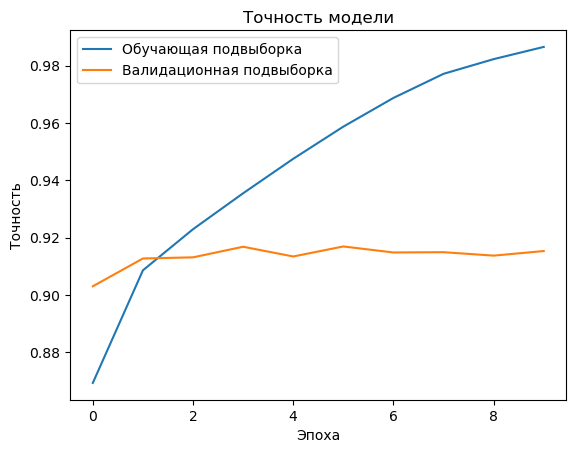

обучающая подвыборка	 – потери: 0.0474 – точность: 0.9866

валидационная подвыборка – потери: 0.5107 – точность: 0.9153

контрольная подвыборка	 – потери: 0.2284 – точность: 0.9608


In [6]:
tf_utils.plot_history(history)
control_loss, control_accuracy = model.evaluate(control_X, control_y, verbose=0)
tf_utils.print_result(history, control_loss, control_accuracy)

### Задание 2

Замена сверточных слоев на слои, реализующие операцию пулинга (Pooling) с функцией максимума.

In [7]:
model = Sequential([
    layers.Rescaling(scale=1./255, input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

history = train_model(model, X, y, val_X, val_y)

Epoch 1/10
2978/2978 - 75s - loss: 0.5295 - accuracy: 0.8396 - val_loss: 0.4057 - val_accuracy: 0.8763 - 75s/epoch - 25ms/step
Epoch 2/10
2978/2978 - 75s - loss: 0.3723 - accuracy: 0.8868 - val_loss: 0.3476 - val_accuracy: 0.8926 - 75s/epoch - 25ms/step
Epoch 3/10
2978/2978 - 73s - loss: 0.3305 - accuracy: 0.8994 - val_loss: 0.3265 - val_accuracy: 0.9013 - 73s/epoch - 24ms/step
Epoch 4/10
2978/2978 - 74s - loss: 0.3045 - accuracy: 0.9070 - val_loss: 0.3168 - val_accuracy: 0.9042 - 74s/epoch - 25ms/step
Epoch 5/10
2978/2978 - 76s - loss: 0.2830 - accuracy: 0.9124 - val_loss: 0.3079 - val_accuracy: 0.9061 - 76s/epoch - 25ms/step
Epoch 6/10
2978/2978 - 76s - loss: 0.2644 - accuracy: 0.9182 - val_loss: 0.3079 - val_accuracy: 0.9080 - 76s/epoch - 26ms/step
Epoch 7/10
2978/2978 - 74s - loss: 0.2482 - accuracy: 0.9225 - val_loss: 0.3075 - val_accuracy: 0.9076 - 74s/epoch - 25ms/step
Epoch 8/10
2978/2978 - 75s - loss: 0.2330 - accuracy: 0.9269 - val_loss: 0.2967 - val_accuracy: 0.9129 - 75s/ep

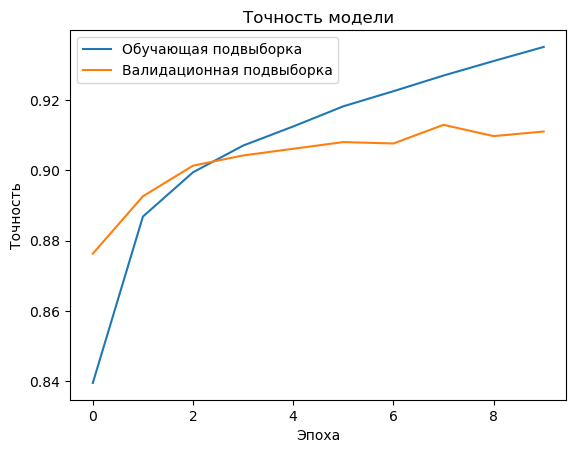

обучающая подвыборка	 – потери: 0.2048 – точность: 0.9350

валидационная подвыборка – потери: 0.3121 – точность: 0.9110

контрольная подвыборка	 – потери: 0.1368 – точность: 0.9588


In [8]:
tf_utils.plot_history(history)
control_loss, control_accuracy = model.evaluate(control_X, control_y, verbose=0)
tf_utils.print_result(history, control_loss, control_accuracy)

После добавления max pooling точность на контрольной выборке немного снизилась по сравнению с моделью без пулинга (с 96.08% до 95.88%). Это произошло из-за уменьшения количества обучаемых параметров. Ещё одной особенностью стала большая устойчивость к переобучению.

### Задание 3

Реализация нейронной сети LeNet5.

In [9]:
model = Sequential([
    layers.Rescaling(scale=1./255, input_shape=(28, 28, 1)),
    layers.Conv2D(6, (5, 5), activation='tanh', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, (5, 5), activation='tanh'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(120, (5, 5), activation='tanh'),
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

history = train_model(model, X, y, val_X, val_y)

Epoch 1/10
2978/2978 - 440s - loss: 0.4674 - accuracy: 0.8639 - val_loss: 0.3562 - val_accuracy: 0.8944 - 440s/epoch - 148ms/step
Epoch 2/10
2978/2978 - 445s - loss: 0.3445 - accuracy: 0.8964 - val_loss: 0.3287 - val_accuracy: 0.9003 - 445s/epoch - 149ms/step
Epoch 3/10
2978/2978 - 442s - loss: 0.3113 - accuracy: 0.9060 - val_loss: 0.3138 - val_accuracy: 0.9057 - 442s/epoch - 149ms/step
Epoch 4/10
2978/2978 - 442s - loss: 0.2906 - accuracy: 0.9107 - val_loss: 0.3030 - val_accuracy: 0.9075 - 442s/epoch - 148ms/step
Epoch 5/10
2978/2978 - 443s - loss: 0.2746 - accuracy: 0.9155 - val_loss: 0.2957 - val_accuracy: 0.9115 - 443s/epoch - 149ms/step
Epoch 6/10
2978/2978 - 440s - loss: 0.2616 - accuracy: 0.9191 - val_loss: 0.2943 - val_accuracy: 0.9115 - 440s/epoch - 148ms/step
Epoch 7/10
2978/2978 - 443s - loss: 0.2503 - accuracy: 0.9223 - val_loss: 0.2900 - val_accuracy: 0.9158 - 443s/epoch - 149ms/step
Epoch 8/10
2978/2978 - 446s - loss: 0.2393 - accuracy: 0.9254 - val_loss: 0.2912 - val_acc

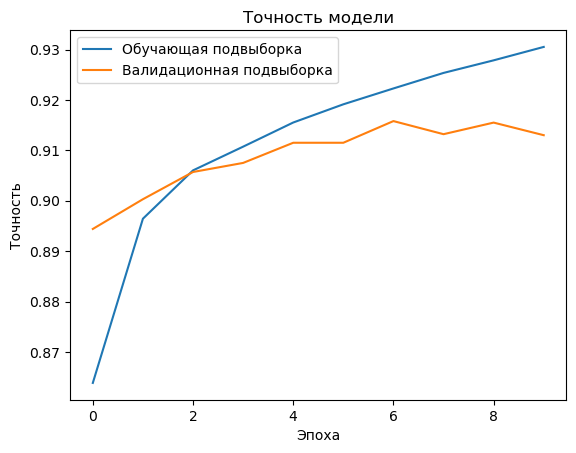

обучающая подвыборка	 – потери: 0.2212 – точность: 0.9305

валидационная подвыборка – потери: 0.2957 – точность: 0.9130

контрольная подвыборка	 – потери: 0.1292 – точность: 0.9610


In [10]:
tf_utils.plot_history(history)
control_loss, control_accuracy = model.evaluate(control_X, control_y, verbose=0)
tf_utils.print_result(history, control_loss, control_accuracy)

### Задание 4

Сравнение максимальных точностей моделей, построенных в лабораторных работах 1-3.

- ЛР 1 (логистическая регрессия): 89.73%
- ЛР 2 (полносвязная нейронная сеть): 96.09%
- ЛР 3 (сверточная нейронная сеть): 96.10%

**Объяснение различий:**
- Логистическая регрессия — более простая модель, способная выделять только линейные зависимости. Поэтомуе её точность ниже, чем у нейронных сетей.
- Полносвязная нейронная сеть имеет значительно больше параметров, что позволяет лучше выявлять нелинейные зависимости.
- Сверточная нейронная сеть учитывает пространственную структуру данных, что делает её эффективной для обработки изображений.